## Imports

In [1]:
import pandas as pd #data preproccessing
import numpy as np #linear algebra

from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot') # plotting style
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline 

## 1. Data Analysis.

### 1.1 Exploratory Data Analysis.

In [2]:
df = pd.read_csv('data/Most_Streamed Spotify_Songs 2024.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Track Score,4600.0,41.844043,38.543766,19.4,23.3,29.9,44.425,725.4
Spotify Popularity,3796.0,63.501581,16.186438,1.0,61.0,67.0,73.000,96.0
Apple Music Playlist Count,4039.0,54.603120,71.612270,1.0,10.0,28.0,70.000,859.0
Deezer Playlist Count,3679.0,32.310954,54.274538,1.0,5.0,15.0,37.000,632.0
Amazon Playlist Count,3545.0,25.348942,25.989826,1.0,8.0,17.0,34.000,210.0
TIDAL Popularity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Explicit Track,4600.0,0.358913,0.479734,0.0,0.0,0.0,1.000,1.0


### 1.2 Data preproccessing.

for convenience, it would be better to rename the column names to lower case and add underscores instead of spaces, if any

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns.tolist()

['track',
 'album_name',
 'artist',
 'release_date',
 'isrc',
 'all_time_rank',
 'track_score',
 'spotify_streams',
 'spotify_playlist_count',
 'spotify_playlist_reach',
 'spotify_popularity',
 'youtube_views',
 'youtube_likes',
 'tiktok_posts',
 'tiktok_likes',
 'tiktok_views',
 'youtube_playlist_reach',
 'apple_music_playlist_count',
 'airplay_spins',
 'siriusxm_spins',
 'deezer_playlist_count',
 'deezer_playlist_reach',
 'amazon_playlist_count',
 'pandora_streams',
 'pandora_track_stations',
 'soundcloud_streams',
 'shazam_counts',
 'tidal_popularity',
 'explicit_track']

But at first let's drop the unuseful columns from the dataset.
isrc and tidal_popularity(0 values), columns that contains info about not very popular platforms and no useful info.

In [6]:
unuseful_columns = [
    'all_time_rank',
    'isrc',
    'tidal_popularity',
    'siriusxm_spins',
    'airplay_spins',
    'deezer_playlist_count',
    'deezer_playlist_reach',
    'amazon_playlist_count',
    'pandora_streams',
    'pandora_track_stations',
    'explicit_track'
]
df = df.drop(columns=unuseful_columns)
df.head()

,track,album_name,artist,release_date,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,youtube_playlist_reach,apple_music_playlist_count,soundcloud_streams,shazam_counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"4,818,457","2,669,262"
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"6,623,075","1,118,279"
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"7,208,651","5,285,340"
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,NaN,"11,822,942"
4,Houdini,Houdini,Eminem,5/31/2024,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"207,179","457,017"


Converting 'release_date' column to datetime dtype.

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y')

Let's make a new column that will consist only a Year from release date. We will need this later.

In [8]:
df['year'] = df['release_date'].dt.year

In [9]:
df.head()

,track,album_name,artist,release_date,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,youtube_playlist_reach,apple_music_playlist_count,soundcloud_streams,shazam_counts,year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"4,818,457","2,669,262",2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"6,623,075","1,118,279",2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"7,208,651","5,285,340",2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,NaN,"11,822,942",2023
4,Houdini,Houdini,Eminem,2024-05-31,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"207,179","457,017",2024


Looking at the cell below, we can see that the most of numeric columns are of type Object. Let's convert them to 'int' type.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   track                       4600 non-null   object        
 1   album_name                  4600 non-null   object        
 2   artist                      4595 non-null   object        
 3   release_date                4600 non-null   datetime64[ns]
 4   track_score                 4600 non-null   float64       
 5   spotify_streams             4487 non-null   object        
 6   spotify_playlist_count      4530 non-null   object        
 7   spotify_playlist_reach      4528 non-null   object        
 8   spotify_popularity          3796 non-null   float64       
 9   youtube_views               4292 non-null   object        
 10  youtube_likes               4285 non-null   object        
 11  tiktok_posts                3427 non-null   object      

In [11]:
num_cols = [
 'spotify_streams',
 'spotify_playlist_count',
 'spotify_playlist_reach',
 'youtube_views',
 'youtube_likes',
 'tiktok_posts',
 'tiktok_likes',
 'tiktok_views',
 'youtube_playlist_reach',
 'soundcloud_streams',
 'shazam_counts'
]

def from_str_to_int(s):
    if type(s) != type(""):
        return s
    if '.' in s:
        s = s.replace('.','')
    if ',' in s:
        s = s.replace(',','')
    return int(s)

for col in num_cols:
    df[col] = df[col].apply(from_str_to_int)
    
pd.options.display.float_format ='{:.3f}'.format
df[num_cols].head()

,spotify_streams,spotify_playlist_count,spotify_playlist_reach,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,youtube_playlist_reach,soundcloud_streams,shazam_counts
0,390470936.000,30716.000,196631588.000,84274754.000,1713126.000,5767700.000,651565900.000,5332281936.000,150597040.000,4818457.000,2669262.000
1,323703884.000,28113.000,174597137.000,116347040.000,3486739.000,674700.000,35223547.000,208339025.000,156380351.000,6623075.000,1118279.000
2,601309283.000,54331.000,211607669.000,122599116.000,2228730.000,3025400.000,275154237.000,3369120610.000,373784955.000,7208651.000,5285340.000
3,2031280633.000,269802.000,136569078.000,1096100899.000,10629796.000,7189811.000,1078757968.000,14603725994.000,3351188582.000,NaN,11822942.000
4,107034922.000,7223.000,151469874.000,77373957.000,3670188.000,16400.000,NaN,NaN,112763851.000,207179.000,457017.000


### 1.3 Data cleaning.

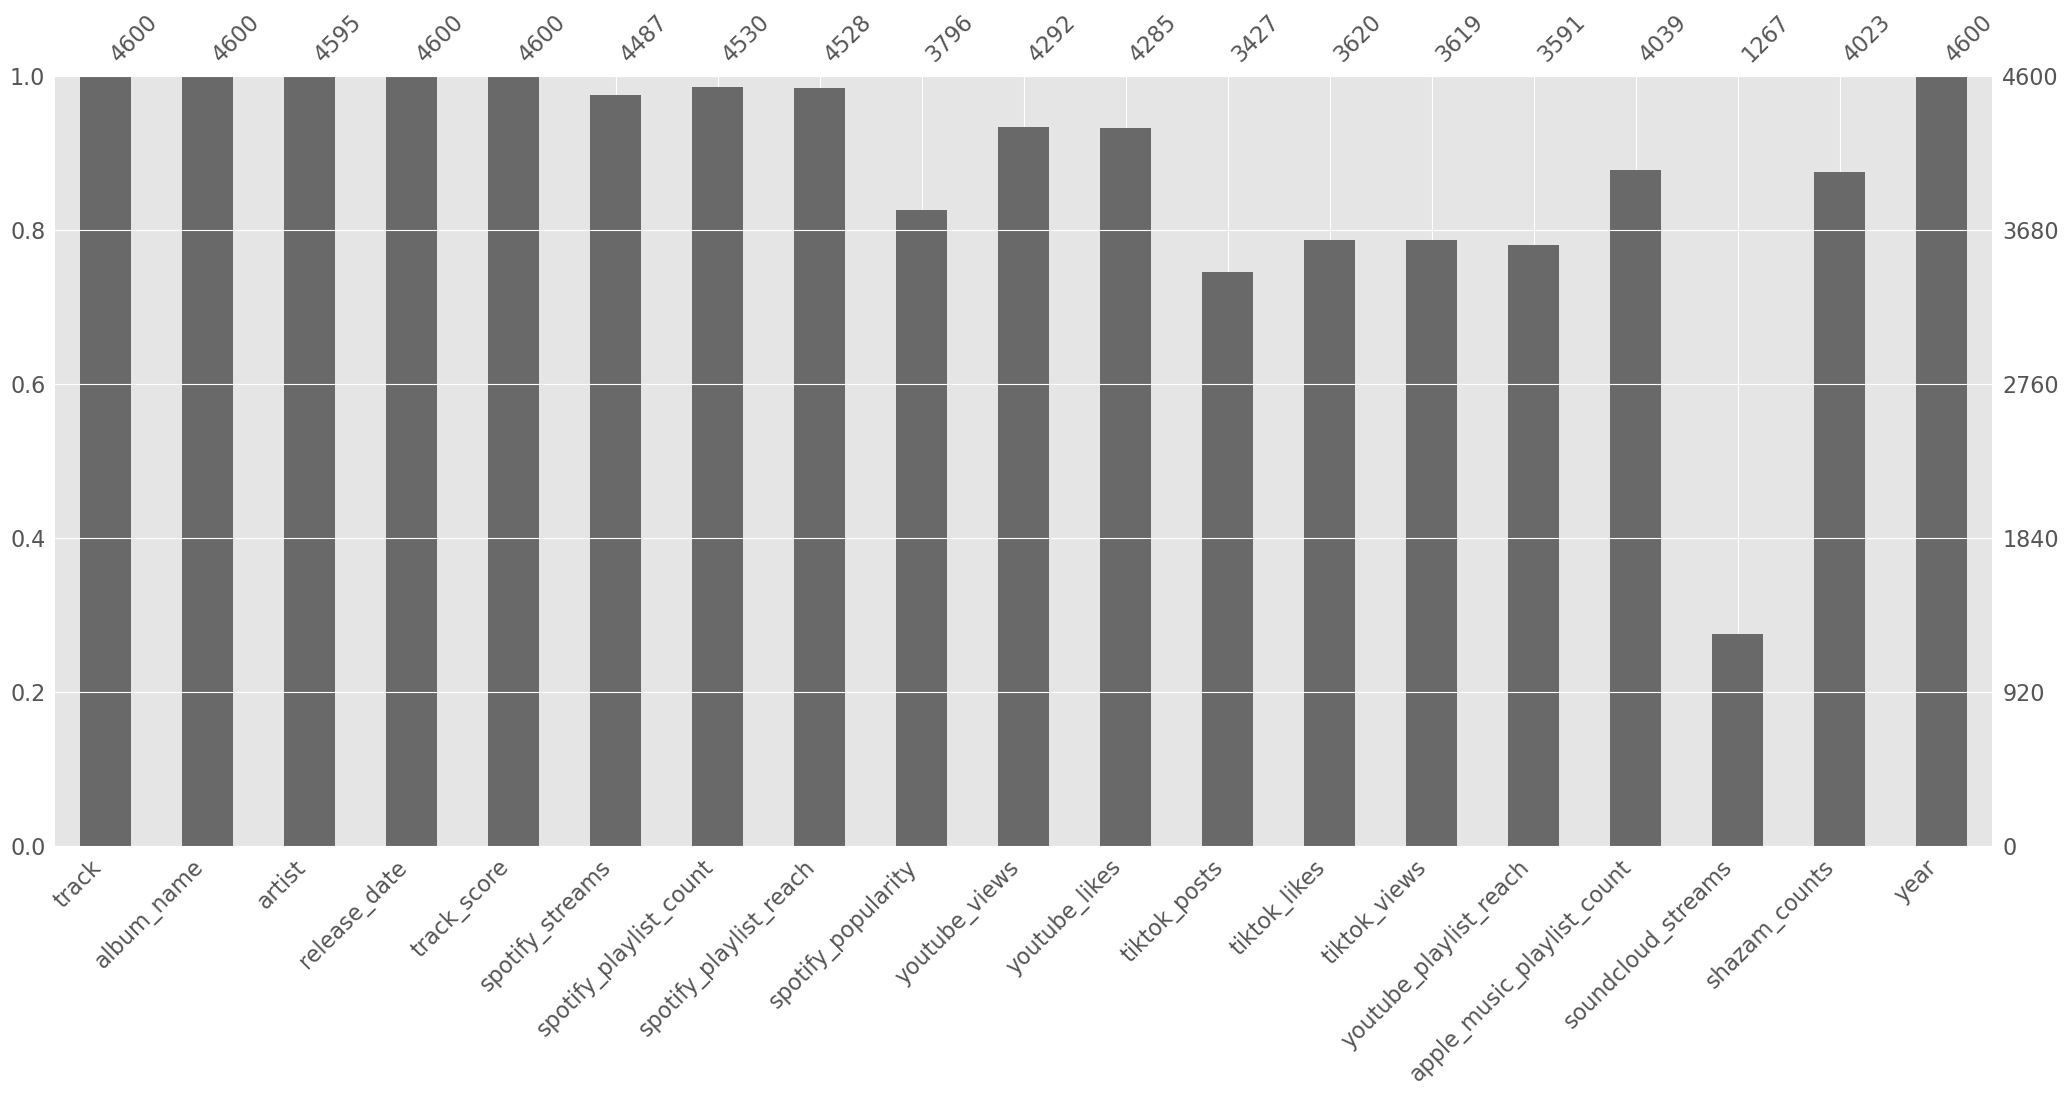

In [12]:
msno.bar(df)

plt.show()

In [13]:
missing_cols = [cname for cname in df.columns if df[cname].isna().sum() > 1]
missing_cols

['artist',
 'spotify_streams',
 'spotify_playlist_count',
 'spotify_playlist_reach',
 'spotify_popularity',
 'youtube_views',
 'youtube_likes',
 'tiktok_posts',
 'tiktok_likes',
 'tiktok_views',
 'youtube_playlist_reach',
 'apple_music_playlist_count',
 'soundcloud_streams',
 'shazam_counts']

In [14]:
df['artist'] = df['artist'].fillna('Unknown')

In [15]:
for num_missing_col in missing_cols:
    if num_missing_col != 'artist':
        df[num_missing_col] = df[num_missing_col].fillna(df[num_missing_col].median())

In [16]:
df.isnull().sum()

track                         0
album_name                    0
artist                        0
release_date                  0
track_score                   0
spotify_streams               0
spotify_playlist_count        0
spotify_playlist_reach        0
spotify_popularity            0
youtube_views                 0
youtube_likes                 0
tiktok_posts                  0
tiktok_likes                  0
tiktok_views                  0
youtube_playlist_reach        0
apple_music_playlist_count    0
soundcloud_streams            0
shazam_counts                 0
year                          0
dtype: int64

## 2. Data Visualization.

Top 5 tracks with highest Track Score.

In [17]:
top_5_tracks = df.sort_values(by='track_score', ascending=False).head(5)[['artist', 'track', 'album_name']]
top_5_tracks

,artist,track,album_name
0,Tommy Richman,MILLION DOLLAR BABY,Million Dollar Baby - Single
1,Kendrick Lamar,Not Like Us,Not Like Us
2,Artemas,i like the way you kiss me,I like the way you kiss me
3,Miley Cyrus,Flowers,Flowers - Single
4,Eminem,Houdini,Houdini


### 2.1.1 Top 10 artists with highest Spotify Streams.

In [18]:
spotify_info = df[['artist', 'spotify_streams']]
spotify_info = spotify_info.groupby('artist').agg({'spotify_streams':['sum']}).reset_index()
spotify_info.columns = ['Artist', 'Total spotify streams']
sorted_artists_by_sssum = spotify_info.sort_values(by='Total spotify streams', ascending=False)[:10]

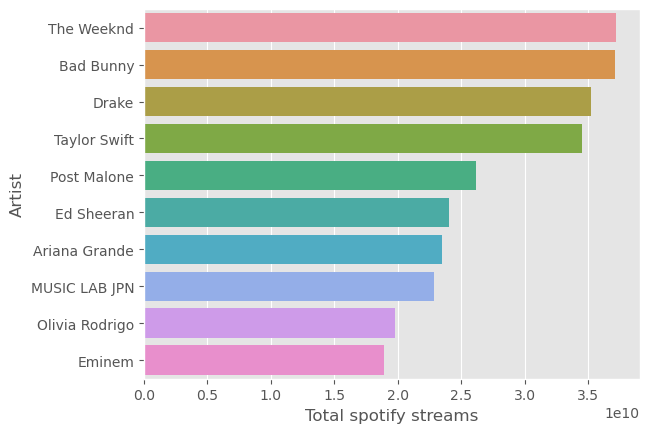

In [19]:
sns.barplot(y='Artist', x='Total spotify streams', data=sorted_artists_by_sssum);

The Weeknd has the most Spotify Streams in total.

### 2.1.2 Top 10 artists with most Youtube Views.

In [20]:
youtube_views = df[['artist', 'youtube_views']].groupby('artist').agg({'youtube_views': ['sum']}).reset_index()
youtube_views.columns = ['Artist', 'Total Youtube Views']
sorted_youtube_views = youtube_views.sort_values(by='Total Youtube Views', ascending=False)[:10]

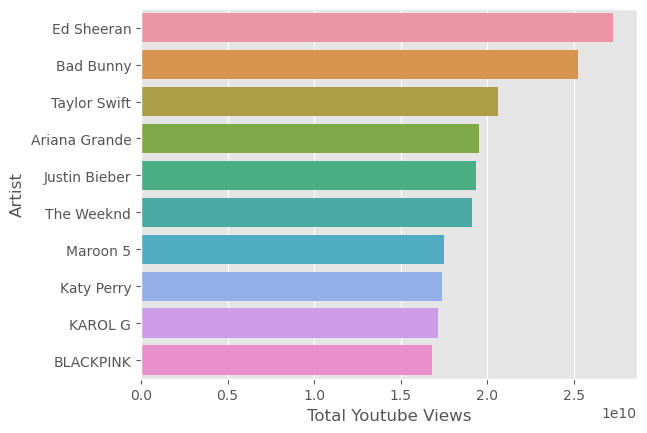

In [21]:
sns.barplot(y='Artist', x='Total Youtube Views', data=sorted_youtube_views);

Barplot shows that Ed Sheeran has the most biggest number of total youtube views.

Let us see what artist has the most Youtube and Spotify streams.

In [22]:
joined_spotify_and_youtube_artists = pd.merge(sorted_artists_by_sssum, sorted_youtube_views, 'inner')
joined_spotify_and_youtube_artists.sort_values(by=['Total spotify streams', 'Total Youtube Views'], ascending=False)

,Artist,Total spotify streams,Total Youtube Views
0,The Weeknd,37188390998.000,19080410410.000
1,Bad Bunny,37054834425.000,25221026702.000
2,Taylor Swift,34470771165.000,20585412682.000
3,Ed Sheeran,24014900390.000,27273658604.000
4,Ariana Grande,23464991696.000,19525948099.000


### 2.1.3 Top 10 artists with highest TikTok views.

In [23]:
tiktok_views = df[['artist', 'tiktok_views']].groupby('artist').agg({'tiktok_views': ['sum']}).reset_index()
tiktok_views.columns = ['Artist', 'TikTok Views']
sorted_tiktok_views = tiktok_views.sort_values(by='TikTok Views', ascending=False)[:10]

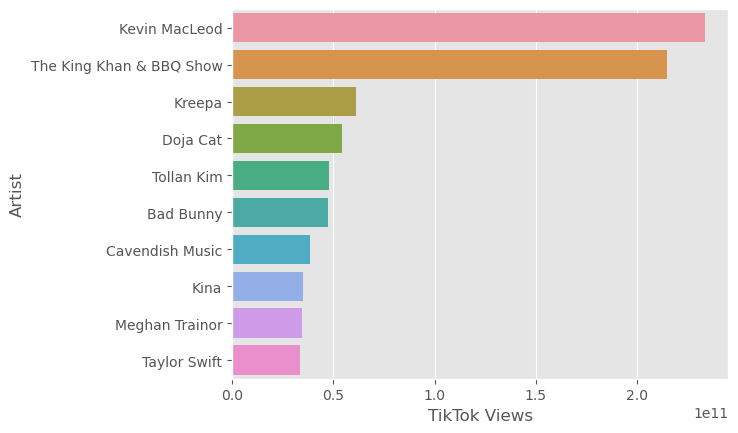

In [24]:
sns.barplot(y='Artist', x='TikTok Views', data=sorted_tiktok_views);

Kevin Macleod has the biggest number of total TikTok views.

### 2.1.4 Top 10 artists with highest Soundcloud Streams.

In [25]:
soundcloud_info = df[['artist', 'soundcloud_streams']].groupby('artist').agg({'soundcloud_streams': ['sum']}).reset_index()
soundcloud_info.columns = ['Artist', 'Soundcloud Streams']
sorted_soundcloud = soundcloud_info.sort_values(by='Soundcloud Streams', ascending=False)[:10]

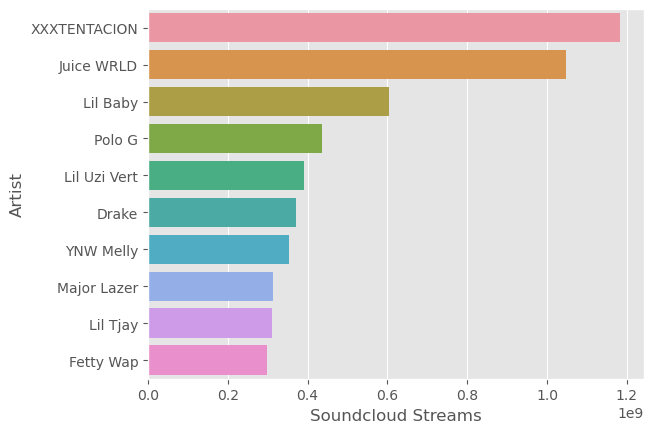

In [26]:
sns.barplot(y='Artist', x='Soundcloud Streams', data=sorted_soundcloud);

XXXtentacion has the highest number of total Soundcloud Streams.

### 2.1.5 Top 10 tracks with the highest Shazam Count.

In [27]:
shazam_tracks = df[['track', 'shazam_counts']]
shazam_tracks.groupby('track').agg({'shazam_counts':['sum']}).reset_index()
shazam_tracks.columns = ['Track Name', 'Total Shazam Count']
sorted_shazam_tracks = shazam_tracks.sort_values(by='Total Shazam Count', ascending=False)[:10]

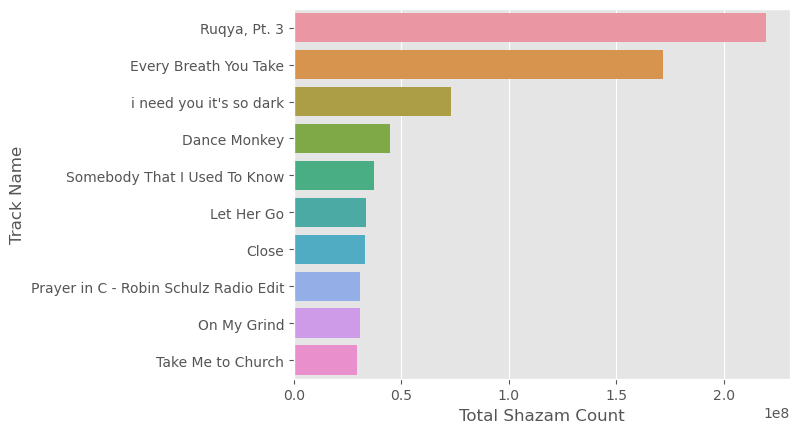

In [28]:
sns.barplot(y='Track Name', x='Total Shazam Count', data=sorted_shazam_tracks);

### 2.1.6 Number of tracks over time.

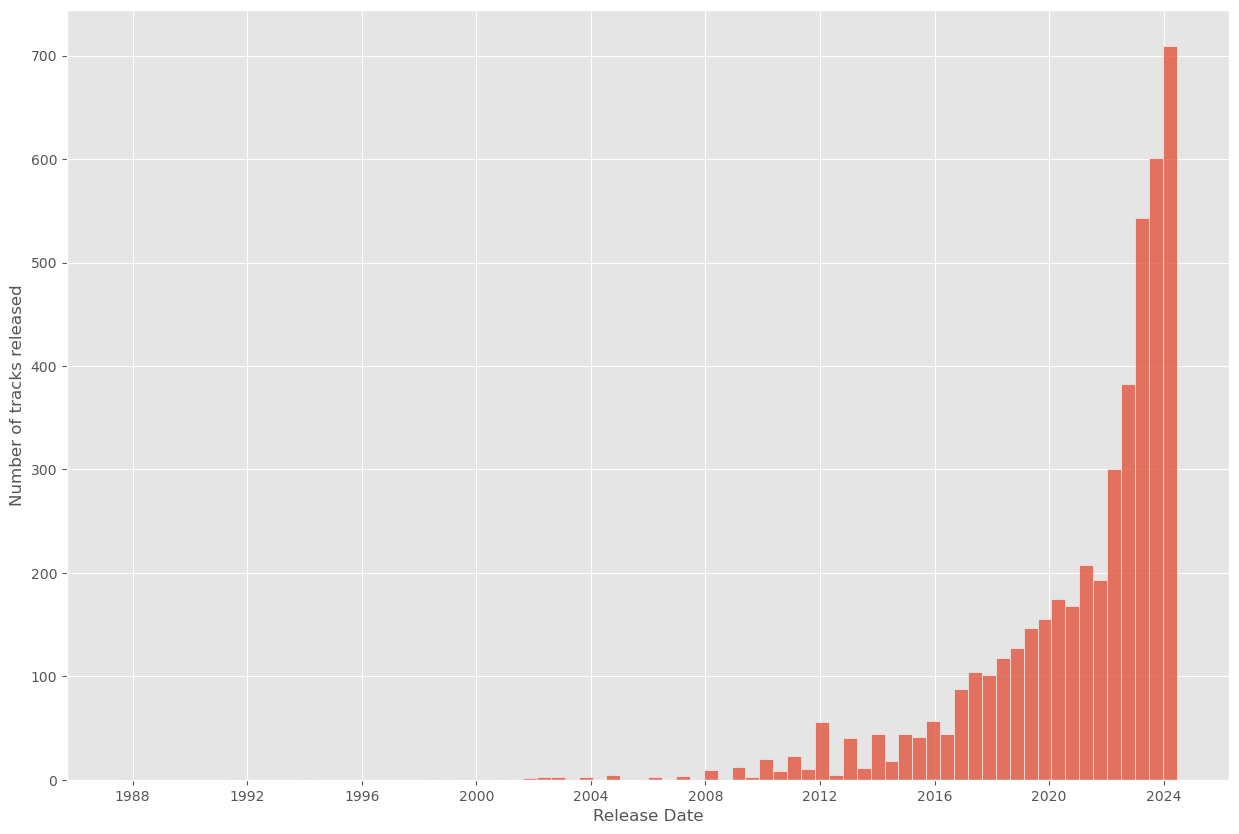

In [29]:
plt.figure(figsize=(15, 10))

sns.histplot(df['release_date'])

plt.xlabel('Release Date')
plt.ylabel('Number of tracks released')

plt.show();

### 2.1.7 Number of tracks over decades.

In [30]:
tracks_20s = df[(df['release_date'] > '2020-01-01')]
tracks_10s = df[(df['release_date'] > '2010-01-01') & (df['release_date'] < '2019-12-31')]
tracks_00s = df[(df['release_date'] > '2000-01-01') & (df['release_date'] > '2009-12-31')]
tracks_90s = df[(df['release_date'] > '1990-01-01') & (df['release_date'] > '1999-12-31')]
tracks_80s = df[(df['release_date'] > '1980-01-01') & (df['release_date'] > '1989-12-31')]

In [31]:
decade_tracks = {
    'Decade': ['2020s',
               '2010s',
               '2000s',
               '1990s',
               '1980s'],
    'Number of tracks': [tracks_20s.shape[0],
                         tracks_10s.shape[0], 
                         tracks_00s.shape[0],
                         tracks_90s.shape[0],
                         tracks_80s.shape[0]]   
}

df_decade_tracks = pd.DataFrame(decade_tracks)

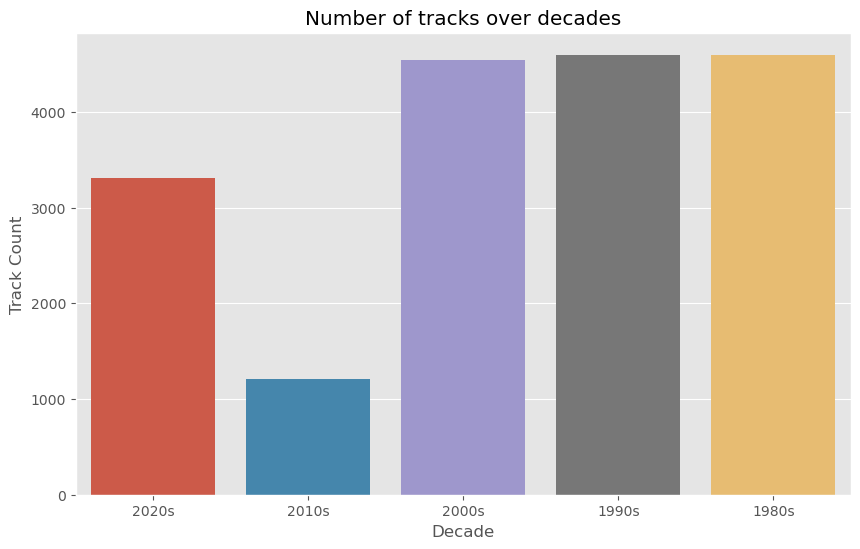

In [32]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Decade', y='Number of tracks', data=df_decade_tracks)

plt.title('Number of tracks over decades')
plt.xlabel('Decade')
plt.ylabel('Track Count')

plt.show();

### 2.1.8 Average track_score per each year.

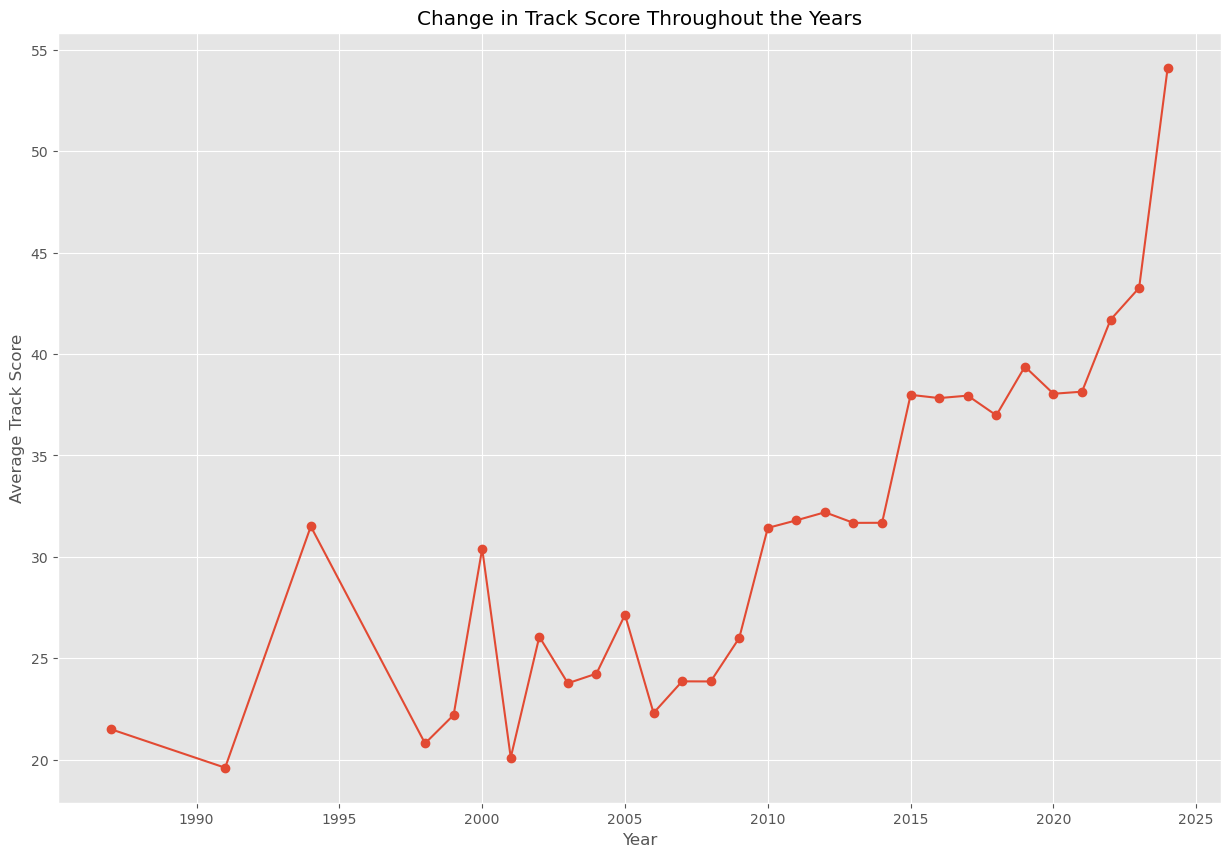

In [33]:
avg_tscore_per_year = df.groupby('year')['track_score'].mean()

plt.figure(figsize=(15, 10))

avg_tscore_per_year.plot(kind='line', marker='o')

plt.title('Change in Track Score Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)

plt.show();

### 2.1.9 The best track score per each year.

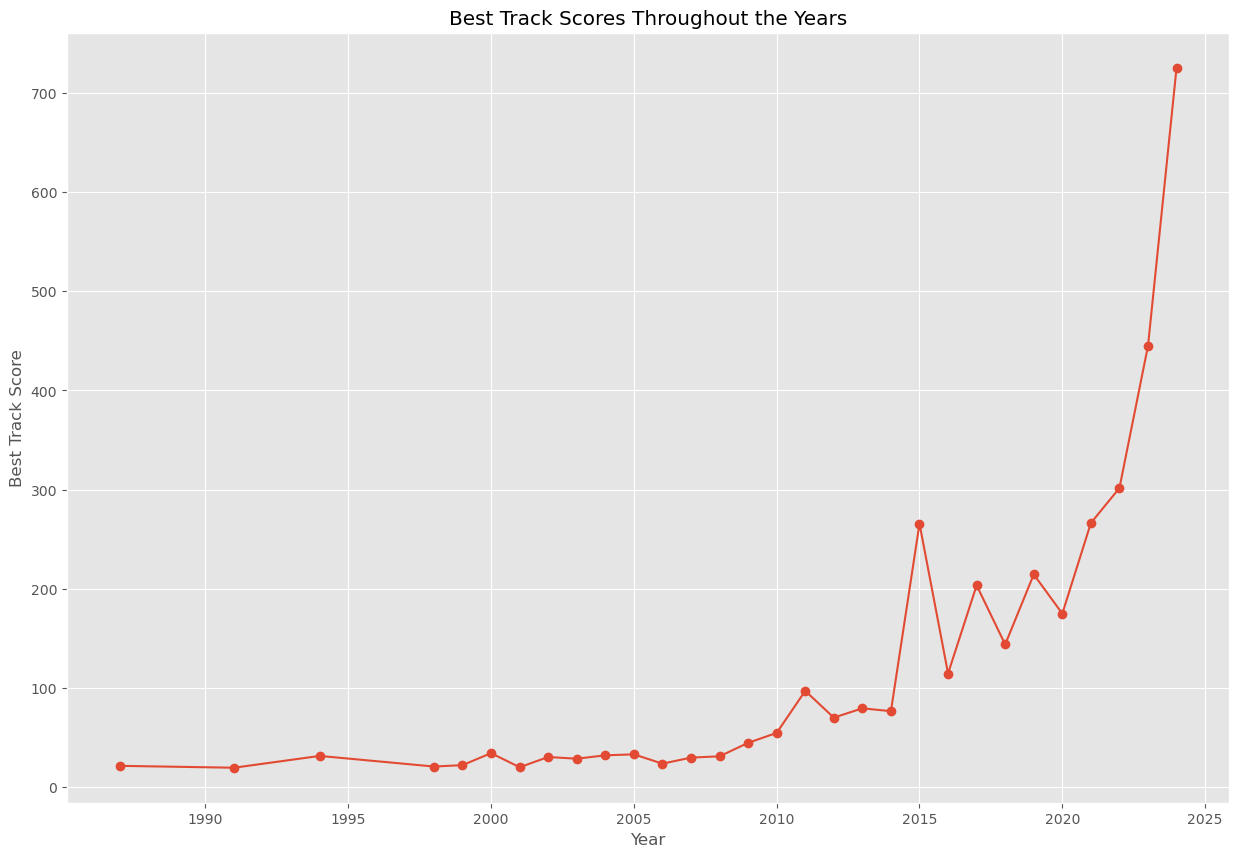

In [34]:
best_track_score_per_year = df.groupby('year')['track_score'].max()

plt.figure(figsize=(15, 10))

best_track_score_per_year.plot(kind='line', marker='o')

plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)

plt.show();

### 2.2 The worst track score throughout years.

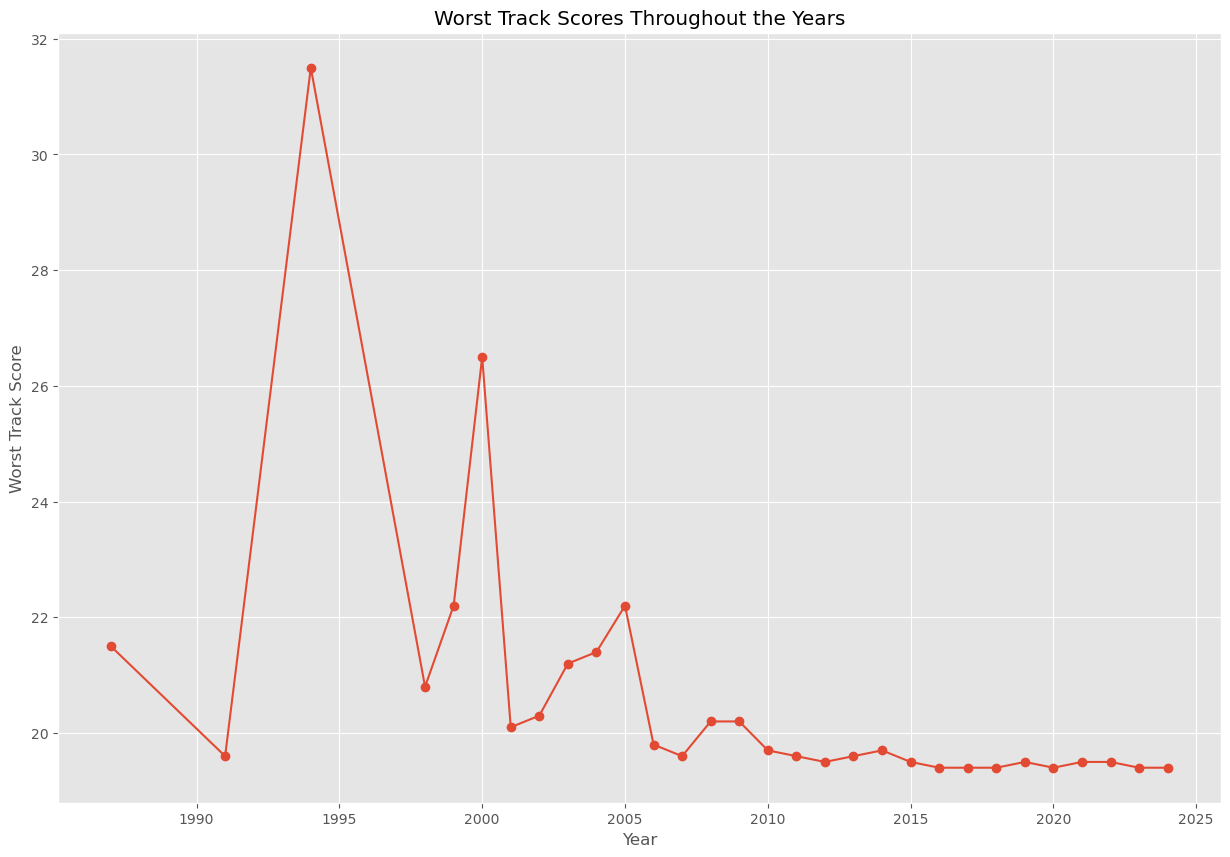

In [35]:
worst_track_score_per_year = df.groupby('year')['track_score'].min()

plt.figure(figsize=(15, 10))

worst_track_score_per_year.plot(kind='line', marker='o')

plt.title('Worst Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)

plt.show()